In [1]:
from Functions import datapipeline
from Functions import filtering_function
from Functions import prediction_funtion
import os
import h5py
import numpy as np

In [20]:
BEGIN_LOCATION = 'DALLAS'
BEGIN_YEARMONTH = 201706
BEGIN_DAY = 28
BEGIN_TIME = 1553

In [21]:
event_id,file_path,file_index = filtering_function.Filtering_function(BEGIN_LOCATION,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME)


finding your file
Cannot find the File


finding your file
File Found
698785 vil/2017/SEVIR_VIL_STORMEVENTS_2017_0101_0630.h5 33
/Users/parthshah/Documents/Northeastern/Spring2022/BigDataAnalytics/Assignment3/data/raw/VIL_H5_Files/SEVIR_VIL_STORMEVENTS_2017_0101_0630.h5
Testing data saved to: /Users/parthshah/Documents/Northeastern/Spring2022/BigDataAnalytics/Assignment3/API/Intermediate_Files/698785
/Users/parthshah/Documents/Northeastern/Spring2022/BigDataAnalytics/Assignment3/API/Intermediate_Files/698785
loading Model: gan_generator
Loading Data
(25, 384, 384, 13) (25, 384, 384, 12)


2022-03-10 00:51:15.962032: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-10 00:51:15.962427: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-10 00:51:16.561193: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


1
(1, 384, 384, 12)
Saved Outputs


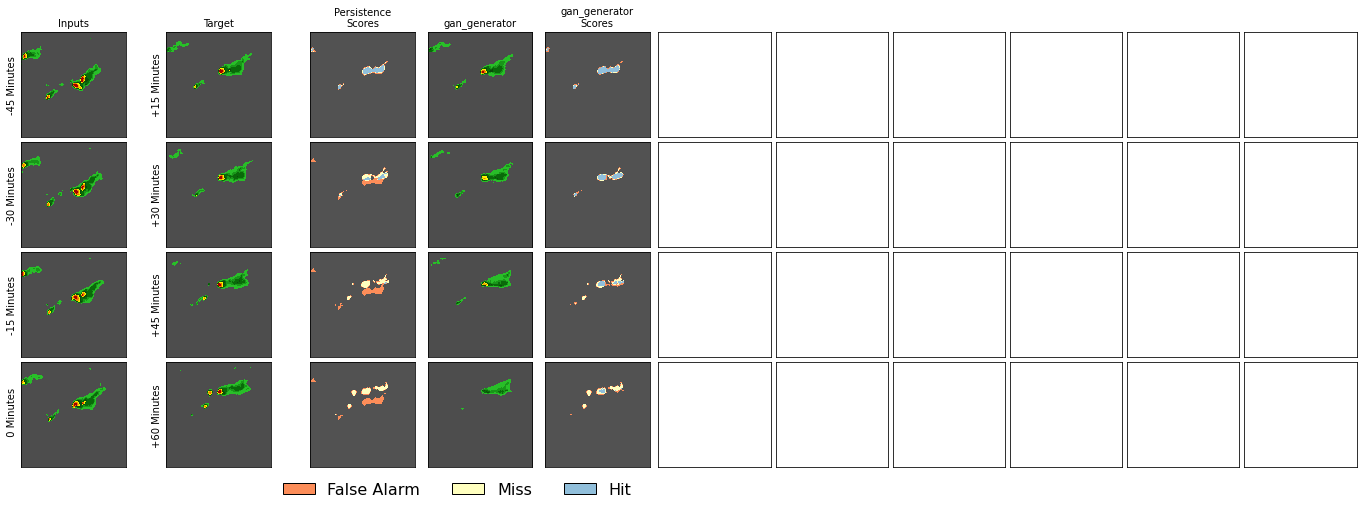

In [5]:
print(event_id,file_path,file_index)
path = datapipeline.run(event_id,file_path,file_index)
print(path)
prediction_funtion.predict(path,"gan_generator",23)


In [4]:
datapipeline.run(file_path,file_index)

/Users/parthshah/Documents/Northeastern/Spring2022/BigDataAnalytics/Assignment3/data/raw/VIL_H5_Files/SEVIR_VIL_STORMEVENTS_2017_0101_0630.h5
Testing data saved to: ./Intermediate_Files/


loading Model: gan_generator
Loading Data
(25, 384, 384, 13) (25, 384, 384, 12)


2022-03-09 18:38:46.897914: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-09 18:38:46.898128: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-09 18:38:47.238992: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


1
(1, 384, 384, 12)
Saved Outputs


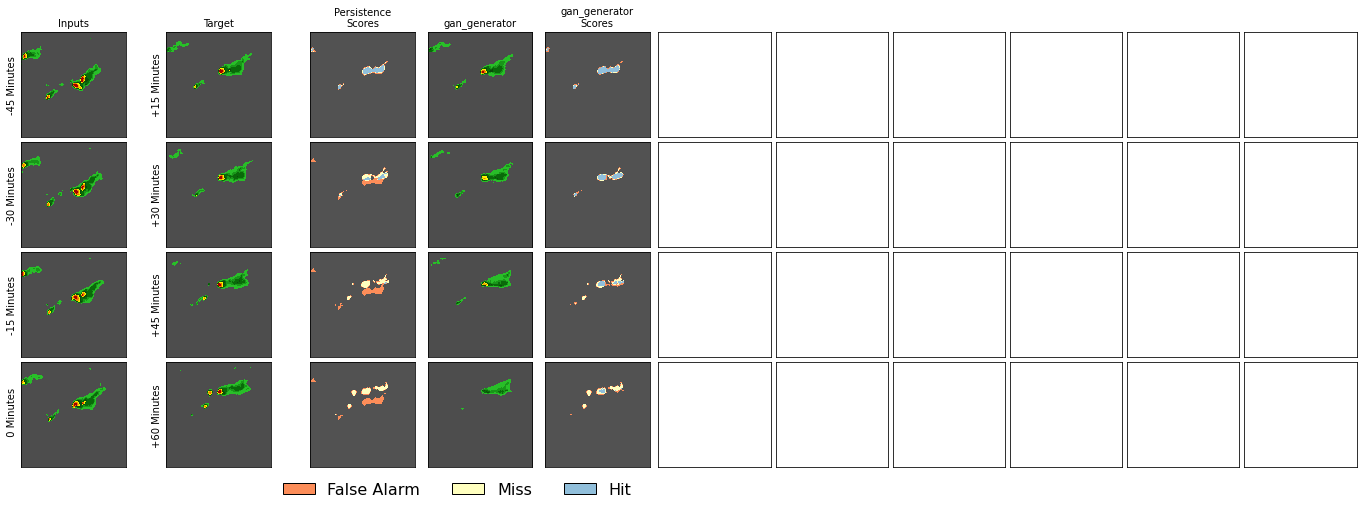

In [2]:
prediction_funtion.predict("gan_generator",23)

In [18]:
a = h5py.File('/Users/parthshah/Documents/Northeastern/Spring2022/BigDataAnalytics/Assignment3/API/Intermediate_Files/698785/Prediction/Array/Y_Pred.h5','r')

In [16]:
a = h5py.File('/Users/parthshah/Documents/Northeastern/Spring2022/BigDataAnalytics/Assignment3/API/Prediction/Array/Y_Pred.h5','r')

In [37]:
a['Pred'].shape

(1, 384, 384, 12)

In [22]:
print(a['Pred'].shape)

(1, 384, 384, 12)


In [15]:
import glob
from PIL import Image
def make_gif(frame_folder):
    frames = [Image.open(image) for image in glob.glob(f"{frame_folder}/*.png")]
    frame_one = frames[0]
    print(frames)
    frame_one.save("my_awesomea.gif", format="GIF", append_images=frames,
               save_all=True, duration=100, loop=0)
    
if __name__ == "__main__":
    make_gif("/Users/parthshah/Documents/Northeastern/Spring2022/BigDataAnalytics/Assignment3/API/")

[<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x7F8A69394AF0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x7F8A69394190>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x7F8A69394D60>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x7F8A87B6AC10>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x7F8A87B6AD30>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x7F8A87B6ADC0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x7F8A87B6ACA0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x7F8A87B6ADF0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x7F8A87B6AE50>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x7F8A87B6AEB0>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x7F8A87B6AF10>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=432x288 at 0x7F8A87B6AF70>]


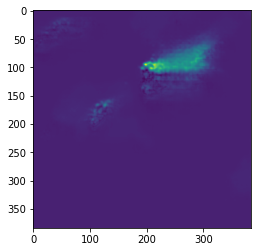

In [41]:
from matplotlib import pyplot as plt
img = []
for i in range(12):
    plt.imshow(a['Pred'][0][:,:,11])
    img.append(plt)

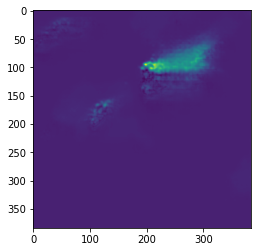

In [14]:
from matplotlib import pyplot as plt
for i in range(12):
    plt.imshow(a['Pred'][0][:,:,i])
    plt.savefig(str(i)+".png")


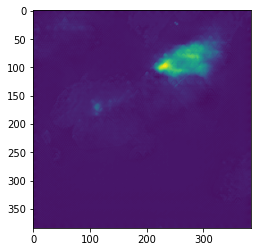

In [19]:
plt.imshow(a['Pred'][0][:,:,11])

In [50]:
import requests
r = requests.get('http://127.0.0.1:8001/nowcast_results/img/')
print(r.content)

b"GIF89a\x90\x01\x90\x01\x81\x00\x00\xff\x00\x00\x00\x00\xff\x00\x00\x00\x00\x00\x00!\xf9\x04\x00\x14\x00\x00\x00!\xff\x0bNETSCAPE2.0\x03\x01\x00\x00\x00,\x00\x00\x00\x00\x90\x01\x90\x01\x00\x08\xff\x00\x03\x08\x1cH\xb0\xa0A\x00\x08\x13&4\xc8\xb0\xa1\xc3\x87\x10#J\x9cH\xb1\xa2\xc5\x8b\x183j\xdc\xc8\xb1\xa3\xc7\x8f ;*\x1cI\x12a\xc8\x93(S\xaa\\\xc9\xb2\xa5\xcb\x970/\x96\x9cI2\xa6\xcd\x9b8s\xea\xdc\xc9\xf3%\xcd\x9f5{\n\x1dJ\xb4\xa8\xd1\xa3\x1b\x81*\r\x8a\xb4\xa9\xd3\xa7P\xa3\x9e\\JU\xa1\xd4\xabX\xb3j\x85Z\xb5\xab\xc9\xad`\xc3\x8a\x1d\x8b\xd2\xabY\xb2h\xd3\xaa]K\xd0\xac[\xb6p\xe3\xcau\xea\xb6\xee\xdc\xbbx\xf3\xc2\xac\xcbW\xaf\xdf\xbf\x803\xf2\x1d\x1c\xb8\xb0\xe1\xc3\x03\x07\xf7E\xcc\xb8\xf1\\\xc5\x84\x1dK\x9e<\x16\xf2b\xca\x983s\xb5|Y\xb3\xe7\xcf=9w\x06M\xba\xb4K\xd1\x91M\xab^\x1d\x12\xf5h\xd6\xb0cWtmW\xb6\xed\xdb\x10i\xbf\xc5\xcd\xbbw\x00\xdd\xb5}\x0b\x87\r|\xf7\xf0\xe3\xa6\x8b\x9fE\xce\x1c\xb4r\xaf\xcd\xa3k~\xdeU\xba\xf5\xc9\xd4\xab^\xdf\xce8;U\xee\xe0\x0b{\xff_\x1a\xbe\xbc\xdf\xf1J\xcd\

In [48]:
from PIL import Image, ImageDraw
def ellipse(x, y, offset):
    image = Image.new("RGB", (400, 400), "blue")
    draw = ImageDraw.Draw(image)
    draw.ellipse((x, y, x+offset, y+offset), fill="red")
    return image
def make_gif():
    frames = []
    x = 0
    y = 0
    offset = 50
    for number in range(20):
        frames.append(ellipse(x, y, offset))
        x += 35
        y += 35
        
    frame_one = frames[0]
    frame_one.save("circle.gif", format="GIF", append_images=frames,
                   save_all=True, duration=100, loop=0)
    
if __name__ == "__main__":
    make_gif()


In [53]:
import os
# Directory
directory = "GeeksforGeeks"
# Parent Directory path
parent_dir = "/Users/parthshah/Documents/Northeastern/Spring2022/BigDataAnalytics/Assignment3/API/Intermediate_Files/"
# Path
path = os.path.join(parent_dir, directory)
# Create the directory
# 'GeeksForGeeks' in
# '/home / User / Documents'
os.mkdir(path)
print(path)

/Users/parthshah/Documents/Northeastern/Spring2022/BigDataAnalytics/Assignment3/API/Intermediate_Files/GeeksforGeeks
